Practical 10 : Data Visualization III: On iris dataset give inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('iris')

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
feature_types = {
    'sepal_length' : 'Numeric',
    'sepal_width' : 'Numeric',
    'petal_length' : 'Numeric',
    'petal_width' : 'Numeric',
    'species' : 'Nominal(categorical)'
}

In [16]:
for features,f_types in feature_types.items() :
    print(f"{features} : {f_types}")

sepal_length : Numeric
sepal_width : Numeric
petal_length : Numeric
petal_width : Numeric
species : Nominal(categorical)


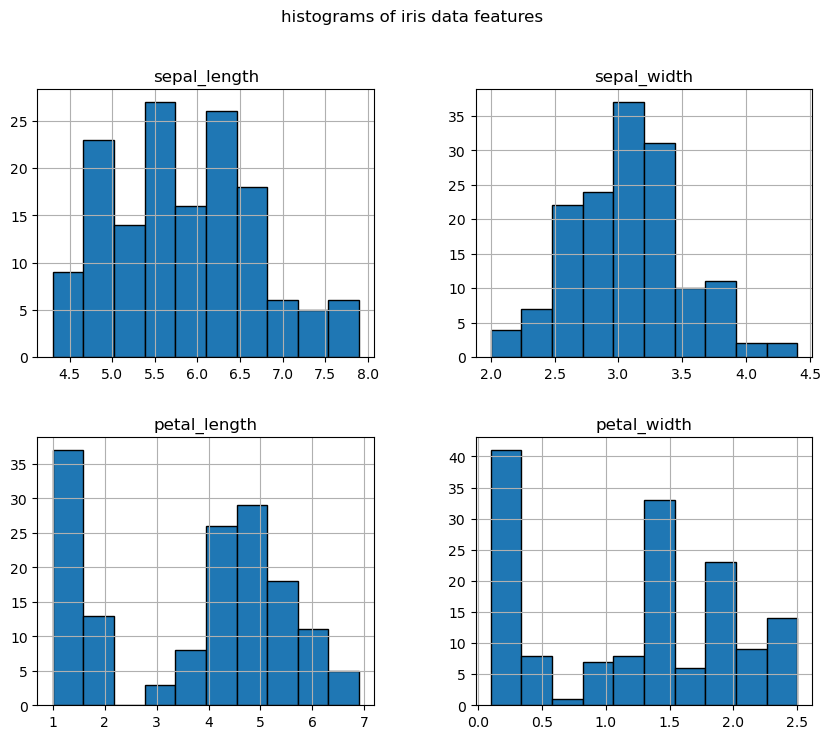

In [33]:
df.hist(bins = 10, figsize = (10,8), edgecolor='black')
plt.suptitle("histograms of iris data features")
plt.show()

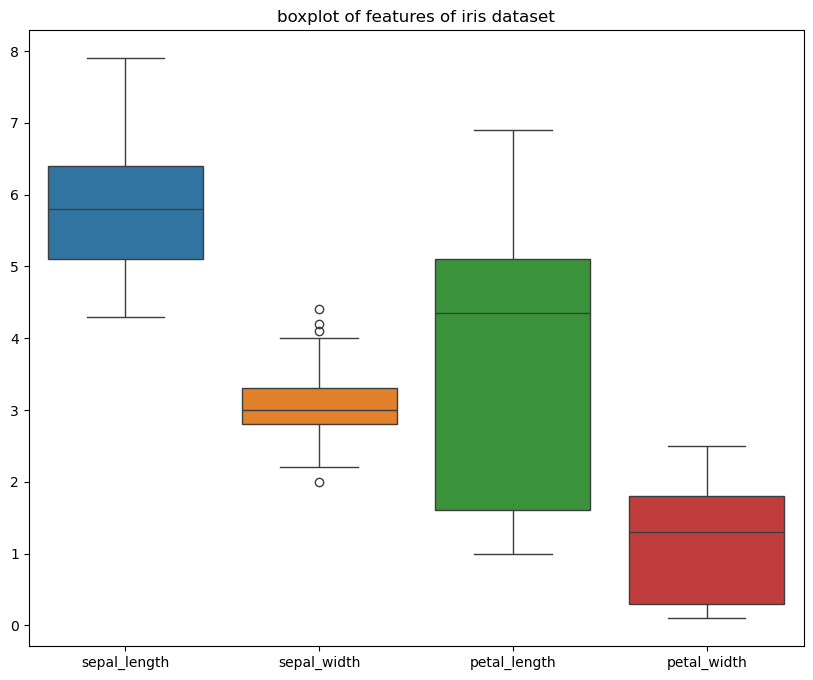

In [26]:
plt.figure(figsize = (10,8))
sns.boxplot(df)
plt.title("boxplot of features of iris dataset")
plt.show()

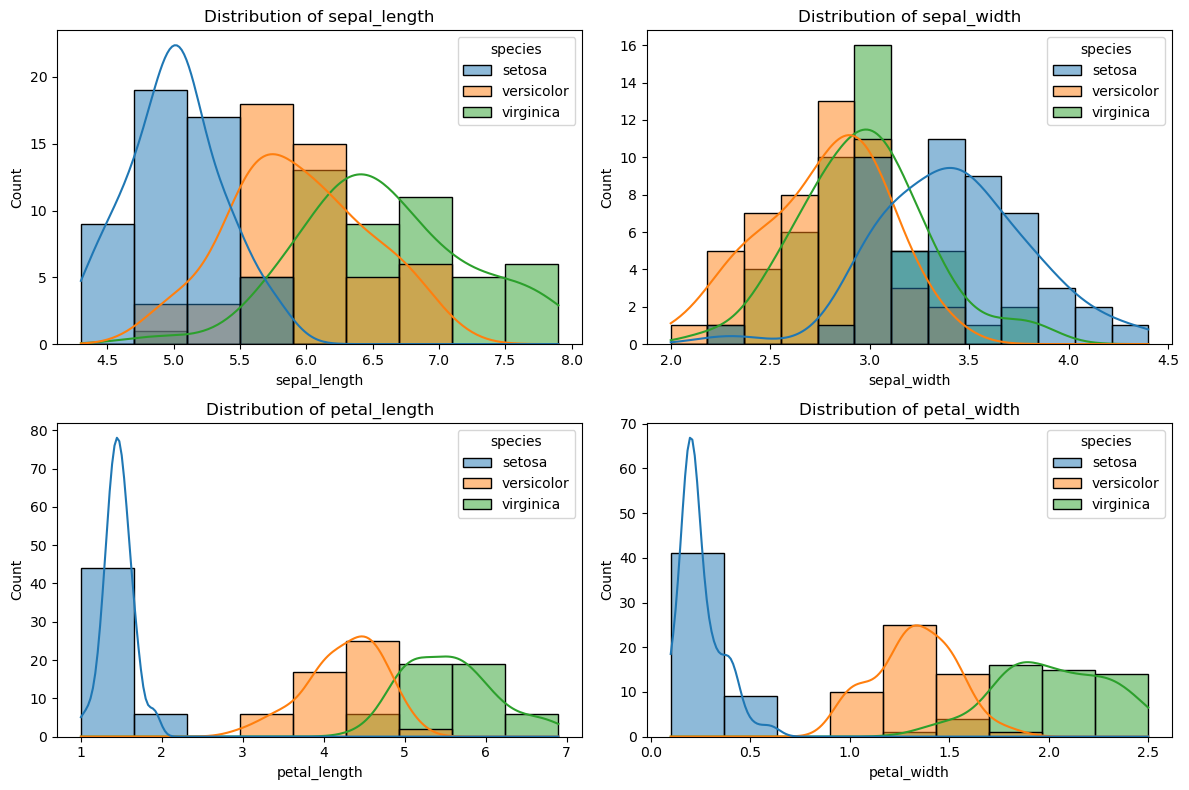

In [28]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df, x=feature, hue="species", kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [38]:
data = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print("\nOutlier Detection (using IQR method):")
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    print(f"{feature}: {len(outliers)} outliers")
    if not outliers.empty:
        print(outliers[[feature, 'species']])
    print()

for feature in data:
    detect_outliers(feature)


Outlier Detection (using IQR method):
sepal_length: 0 outliers

sepal_width: 4 outliers
    sepal_width     species
15          4.4      setosa
32          4.1      setosa
33          4.2      setosa
60          2.0  versicolor

petal_length: 0 outliers

petal_width: 0 outliers

